In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
from datetime import datetime
import time
import ta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

path = "C:/Users/cc/Desktop/CedAlgo/AlgoTrading/database/"

def get_database(Id , interval):
    engine = sqlalchemy.create_engine('sqlite:///'+path+'database_{}.db'.format(interval))
    
    data = pd.read_sql(Id+'USDT' ,engine)
    data.set_index('time' , inplace=True)
    data['volume'] = pd.to_numeric(data['volume'])
    data = data[['open', 'high', 'low' , 'close' , 'volume', 'symbol', 'close_time']]
    return data


def get_multi_base(interval, table = 'close'):
    engine = sqlalchemy.create_engine('sqlite:///'+path+'database_multi_{}.db'.format(interval))
    data = pd.read_sql(table ,engine)
    data.set_index('time', inplace = True)
    return data

In [2]:
data = get_multi_base("1d")

asset = ["BTC", "ETH"]
data = data[asset]

data.head()

,BTC,ETH
time,,
2017-08-17,4285.08,302.00
2017-08-18,4108.37,293.96
2017-08-19,4139.98,290.91
2017-08-20,4086.29,299.10
2017-08-21,4016.00,323.29


## Add returns and cum_ret

In [3]:
symbols = data.columns

for symbol in symbols:
    data[symbol+"_returns"] = data[symbol].pct_change()
    data[symbol+"_cum_rets"] = (data[symbol+"_returns"] + 1).cumprod()
    
    data[symbol+"_log_returns"] = np.log(data[symbol]/data[symbol].shift(1))
    data[symbol+"_log_cum_rets"] = data[symbol+"_log_returns"].cumsum()

In [6]:
data[['BTC_returns', 'BTC_log_returns']]

,BTC_returns,BTC_log_returns
time,,
2017-08-17,NaN,NaN
2017-08-18,-0.041238,-0.042113
2017-08-19,0.007694,0.007665
2017-08-20,-0.012969,-0.013053
2017-08-21,-0.017201,-0.017351
...,...,...
2023-02-03,-0.002428,-0.002431
2023-02-04,-0.000572,-0.000572
2023-02-05,-0.020735,-0.020953


In [5]:
fig = px.line(data[['BTC_log_cum_rets', 'ETH_log_cum_rets']])
fig

In [6]:
fig = px.line(data[['BTC_cum_rets', 'ETH_cum_rets']])

diff = data["BTC_cum_rets"] - data["ETH_cum_rets"]

fig.add_trace(
    go.Scatter(
        x = diff.index,
        y = diff
    )
)

fig

# Correlations

### Plot returns

In [7]:
px.scatter(x = data["BTC_returns"], y = data["ETH_returns"])

In [8]:
data[["BTC_returns", "ETH_returns"]].corr()

,BTC_returns,ETH_returns
BTC_returns,1.000000,0.776124
ETH_returns,0.776124,1.000000


In [9]:
data[["BTC_returns", "ETH_returns"]].rolling(30).corr()

BTC_returns  ETH_returns
time                                            
2017-08-17 BTC_returns          NaN          NaN
           ETH_returns          NaN          NaN
2017-08-18 BTC_returns          NaN          NaN
           ETH_returns          NaN          NaN
2017-08-19 BTC_returns          NaN          NaN
...                             ...          ...
2023-02-02 ETH_returns     0.845076     1.000000
2023-02-03 BTC_returns     1.000000     0.851090
           ETH_returns     0.851090     1.000000
2023-02-04 BTC_returns     1.000000     0.846198
           ETH_returns     0.846198     1.000000

[3996 rows x 2 columns]

# Cointegrations

In [10]:
def dickeyFuller(data : pd.Series, lag = 1):
    adf = ts.adfuller(data["BTC_cum_rets"].dropna(), lag)
    print('Augmented Dickey Fuller test statistic =',adf[0])
    print('Augmented Dickey Fuller p-value =',adf[1])
    print('Augmented Dickey Fuller # of samples =',adf[3])
    print('Augmented Dickey Fuller 1%, 5% and 10% critical values =',adf[4])
    
    print('Stationnarity : ',adf[1]>0.05)
    
    return adf[1]>0.01, adf[1]>0.05, adf[1]>0.1

In [13]:
def cointegration(data1, data2):
    # linear regression
    
    # test adf
    
    # return True or False
    
    return

In [12]:
def optimize_threshold():
    
    return 

In [ ]:
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import seaborn


def zscores(series):
    return (series - series.mean()) / series.std()

score, pvalue, _ = coint(data["BTC_cum_rets"].dropna(), data["ETH_cum_rets"].dropna())

print(f"score : {score} , \n  pvalue : {pvalue} \n _ : {_}")

In [ ]:
ratios = data["BTC_cum_rets"] / data["ETH_cum_rets"]
px.line(ratios)

In [ ]:
fig = px.line(zscores(ratios))
fig.add_hline(1)
fig.add_hline(-1)


    Si Zscore < -1 : Stock 1 is undervalued and stock 2 is overvalued, then buy stock 1 and short-sell stock 2

    Si Zscore > 1 :


In [ ]:
lm_model = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lm_model.fit(data['EWC US Equity'].values.reshape(-1,1), data['EWA US Equity'].values)        # fit() expects 2D array
print('pamameters: %.7f, %.7f' %(lm_model.intercept_, lm_model.coef_))
yfit = lm_model.coef_ * data['EWC US Equity'] + lm_model.intercept_
y_residual = data['EWA US Equity'] - yfit
ts.adfuller(y_residual, 1)

In [5]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import pyfolio as pf
%matplotlib inline

In [8]:
returns = data["BTC_returns"].dropna()

Start date,2017-08-18
End date,2023-02-04
Total months,95
,Backtest
Annual return,23.902%
Cumulative returns,446.512%
Annual volatility,64.415%
Sharpe ratio,0.66
Calmar ratio,0.29
Stability,0.57
Max drawdown,-83.187%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,83.19,2017-12-16,2018-12-15,2020-11-24,767
1,76.63,2021-11-08,2022-11-21,NaT,NaN
2,53.14,2021-04-13,2021-07-20,2021-10-19,136
3,34.04,2017-09-01,2017-09-14,2017-10-12,30
4,25.17,2021-01-08,2021-01-27,2021-02-08,22


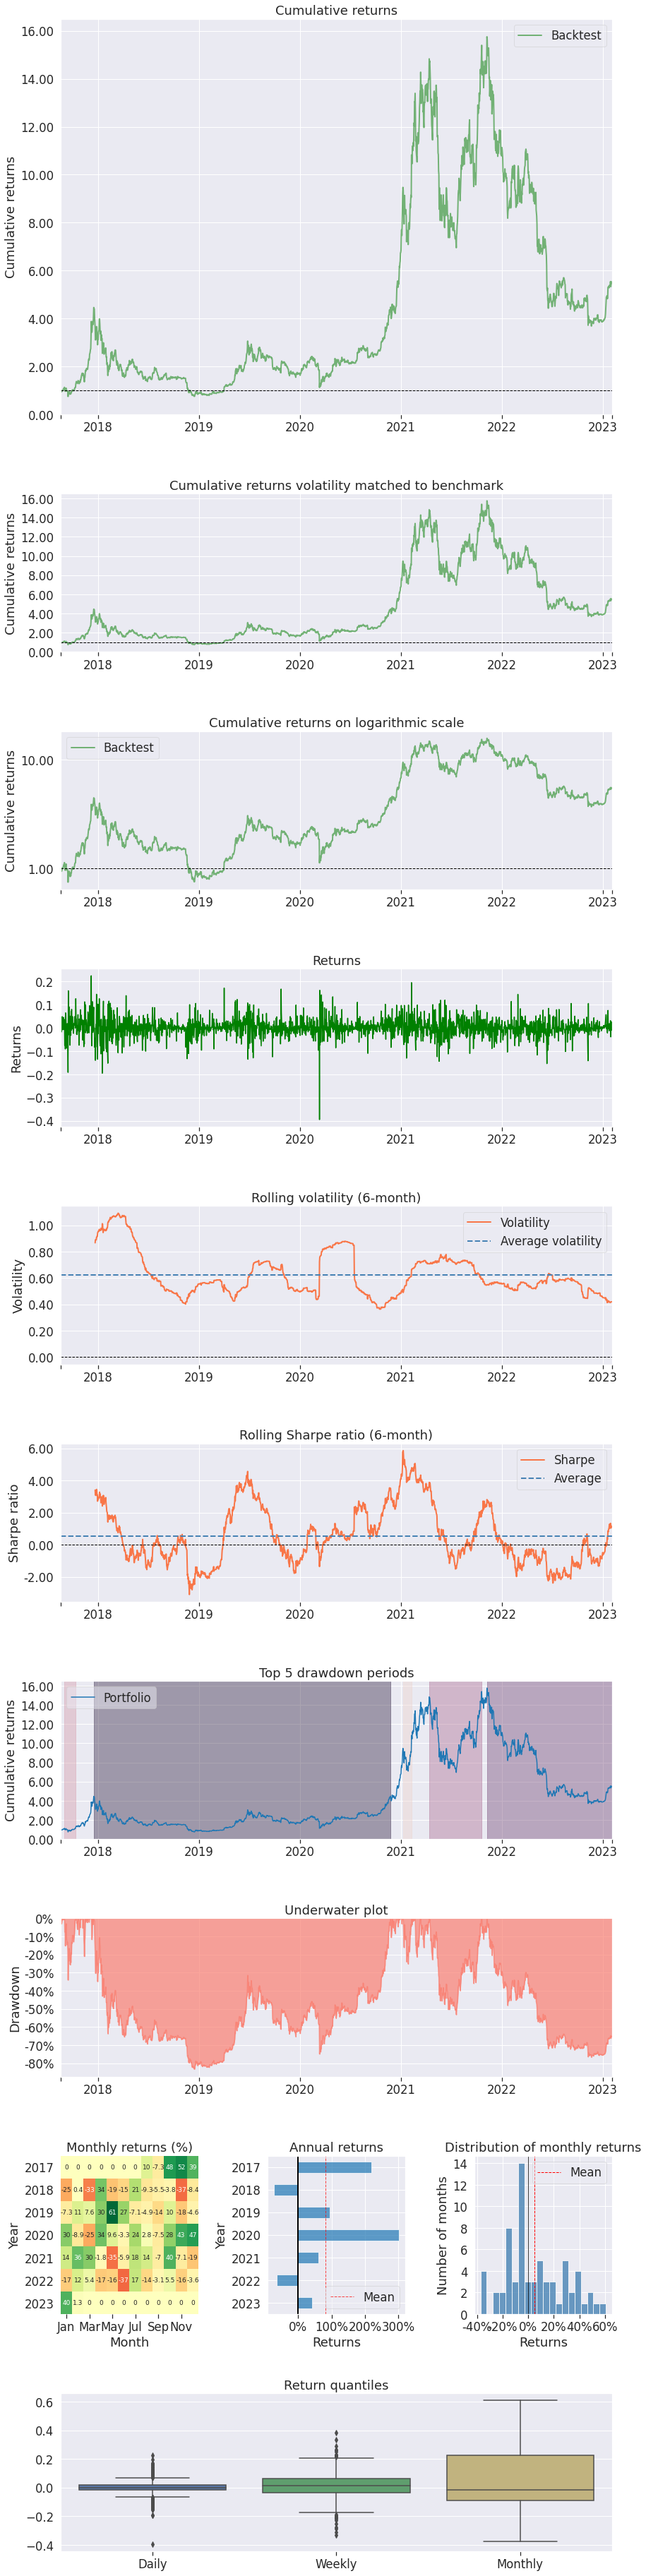

In [9]:
pf.create_returns_tear_sheet(returns)